## Import Packages

In [2]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')

import string

#conda install smart_open==2.0.0
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec

from sklearn.manifold import TSNE

import pandas as pd
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show,figure
%matplotlib inline

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/sampal/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sampal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sampal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Tokenization

In [3]:
from nltk.corpus import gutenberg

In [4]:
# Tokenize sentences using nltk's sent_tokenize()

gberg_sent_tokens = sent_tokenize(gutenberg.raw())

In [5]:
gberg_sent_tokens[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [6]:
gberg_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [7]:
# Further tokenize the sentence to words using word_tokenize 
word_tokenize(gberg_sent_tokens[1])

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [9]:
word_tokenize(gberg_sent_tokens[1])[14]

'father'

In [10]:
#Using the built in method
gberg_sents = gutenberg.sents()

## Converting To Lowercase

In [12]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [13]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

## Removing Stopwords and Punctuation

In [16]:
# Getting both stopwords and punctuation 
stpwords = stopwords.words('english') + list(string.punctuation)

In [17]:
# Removing both with list comprehension
[w.lower() for w in gberg_sents[4] if w.lower() not in stpwords]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

## Stemming

In [19]:
#Create an instnace of the PorterStemmer() and use its stem() method
stemmer = PorterStemmer()

In [20]:
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stpwords]

['youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

## Handling n-grams

### Detecting bigrams
`Phrases()` to train a “detector” to identify how often any given pair of words occurs together in our corpus

`Phraser()` to take the bigram collocations detected by the Phrases() object and then use this information to create an object that can efficiently be passed over our corpus, converting all bigram collocations from two consecutive tokens into a single token

In [21]:
phrases = Phrases(gberg_sents)
bigram = Phraser(phrases)

In [22]:
# Checking count and score of the bigrams present in our corpus
bigram.phrasegrams

{(b'two', b'daughters'): 11.966813731181546,
 (b'her', b'sister'): 17.7960829227865,
 (b"'", b's'): 31.066242737744524,
 (b'very', b'early'): 11.01214147275924,
 (b'Her', b'mother'): 13.529425062715127,
 (b'long', b'ago'): 63.22343628984788,
 (b'more', b'than'): 29.023584433996874,
 (b'had', b'been'): 22.306024648925288,
 (b'an', b'excellent'): 39.063874851750626,
 (b'Miss', b'Taylor'): 453.75918026073305,
 (b'very', b'fond'): 24.134280468850747,
 (b'passed', b'away'): 12.35053642325912,
 (b'too', b'much'): 31.376002029426687,
 (b'did', b'not'): 11.728416217142811,
 (b'any', b'means'): 14.096964108090186,
 (b'wedding', b'-'): 17.4695197740113,
 (b'Her', b'father'): 13.129571562488772,
 (b'after', b'dinner'): 21.5285481168817,
 (b'self', b'-'): 47.79018053120332,
 (b'sixteen', b'years'): 107.0461671612265,
 (b'five', b'years'): 40.128755673408115,
 (b'years', b'old'): 54.735425236061104,
 (b'seven', b'years'): 52.59411150244507,
 (b'each', b'other'): 79.4168405322873,
 (b'a', b'mile'): 

In [35]:
tokenized_sentence ="Jon lives in New York City".split()

In [36]:
tokenized_sentence

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [37]:
bigram[tokenized_sentence]

['Jon', 'lives', 'in', 'New_York', 'City']

After you have identified the bigrams by passing your corpus through the bigram object, you can again run `Phrases()` and `Phraser()` to identify trigrams, 4-grams , 5 grams etc

## Working With Entire Corpus

In [39]:
# Removing capitalization and punctuation from the gutenberg corpus

lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w.lower()not in list(string.punctuation)])

In [40]:
# check for bigrams present
lower_bigram = Phraser(Phrases(lower_sents))

In [ ]:
# Review bigrams detected
lower_bigram.phrasegrams

In [42]:
# Detecting with more conservative thresholds
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))

In [43]:
lower_bigram.phrasegrams

{(b'miss', b'taylor'): 156.44059469941823,
 (b'mr', b'woodhouse'): 82.04651843976633,
 (b'mr', b'weston'): 75.87438262077481,
 (b'mrs', b'weston'): 160.68485093258923,
 (b'great', b'deal'): 93.36368125424357,
 (b'mr', b'knightley'): 161.74131790625913,
 (b'miss', b'woodhouse'): 229.03802722366902,
 (b'years', b'ago'): 74.31594785893046,
 (b'mr', b'elton'): 121.3990121932397,
 (b'dare', b'say'): 89.94000515807346,
 (b'frank', b'churchill'): 1316.4456593286038,
 (b'miss', b'bates'): 276.39588291692513,
 (b'drawing', b'room'): 84.91494947493561,
 (b'mrs', b'goddard'): 143.57843432545658,
 (b'miss', b'smith'): 73.03442128232508,
 (b'few', b'minutes'): 204.16834974753786,
 (b'john', b'knightley'): 83.03755747111268,
 (b'don', b't'): 250.30957446808512,
 (b'good', b'natured'): 88.69936184891343,
 (b'few', b'moments'): 107.77584531675087,
 (b'thousand', b'pounds'): 166.51834523092802,
 (b'o', b'clock'): 89.14789088153573,
 (b'jane', b'fairfax'): 654.5565917587609,
 (b'miss', b'fairfax'): 196.

In [44]:
# Apply the lower_bigra to the complete corpus
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [45]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

## Word Embeddings With Word2Vec

In [46]:
model = Word2Vec(sentences=clean_sents, size=64,
                sg=1, window=10, iter=5,
                min_count=10, workers=4)

In [49]:
# Check the woed vector space
model.wv['man']

array([-0.2343712 , -0.34494862,  0.40849227,  0.23846793, -0.22266011,
        0.02614726, -0.43505523,  0.3940848 ,  0.14519909,  0.03549715,
        0.25921798,  0.45985818,  0.39054328, -0.2499407 ,  0.2057149 ,
        0.302361  ,  0.3981495 , -0.01914163,  0.46373713,  0.13353148,
       -0.3206123 ,  0.1543666 , -0.15191567,  0.02389201,  0.07881676,
        0.32797834,  0.16809085,  0.18574315,  0.22981474, -0.24413908,
        0.23937513, -0.22591323,  0.4947552 ,  0.29137573, -0.2394258 ,
        0.18781564,  0.18543878,  0.5116806 , -0.23560923, -0.20172143,
       -0.13178642,  0.09069812, -0.09800421,  0.4113937 ,  0.31436947,
       -0.32091156,  0.08341745,  0.24411365,  0.2534048 ,  0.11034088,
        0.27602068, -0.09007888,  0.24139431,  0.36538368, -0.30610514,
       -0.3216689 ,  0.2633476 ,  0.39927444,  0.55074626, -0.41791007,
       -0.13965595,  0.13842385, -0.21446127, -0.4144453 ], dtype=float32)

In [55]:
# Checking for most similar
model.wv.most_similar('father',topn=3)

[('mother', 0.8397954106330872),
 ('brother', 0.7310938835144043),
 ('sister', 0.7224586009979248)]

In [56]:
# Getting the similarity score between two words
model.wv.similarity('father','mother')

0.83979535

In [57]:
model.wv.similarity('father','woman')

0.39798212

In [62]:
model.wv.similarity('father','man')

0.26393074

In [63]:
model.wv.most_similar(positive=['father','woman'], negative=['man'])

[('mother', 0.7870785593986511),
 ('sister', 0.7711547613143921),
 ('wife', 0.7625136375427246),
 ('husband', 0.7468754053115845),
 ('daughter', 0.739470362663269),
 ('brother', 0.7021077871322632),
 ('daughters', 0.669276237487793),
 ('loved', 0.6568328738212585),
 ('sarah', 0.6564232110977173),
 ('nurse', 0.6477416753768921)]

In [64]:
model.wv.most_similar(positive=['husband','woman'], negative=['man'])

[('wife', 0.7499470710754395),
 ('sister', 0.7103006839752197),
 ('maid', 0.677865743637085),
 ('daughter', 0.6638273000717163),
 ('mother', 0.6554606556892395),
 ('widow', 0.6366606950759888),
 ('elder', 0.6357304453849792),
 ('brother', 0.6292357444763184),
 ('conceived', 0.6220892667770386),
 ('nurse', 0.6129364967346191)]

## Plotting

In [65]:
# Our original dimension is 64, we need to reduce this so we can plot it
# Dimensionality reduction using TSNE()

tsne = TSNE(n_components=2, n_iter=1000)
X_2d = tsne.fit_transform(model.wv[model.wv.vocab])
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [66]:
coords_df.head()

,x,y,token
0,56.694023,-30.584463,emma
1,32.954044,32.437637,by
2,58.086575,-27.705099,jane
3,15.945505,4.637773,volume
4,0.033068,-35.594604,i


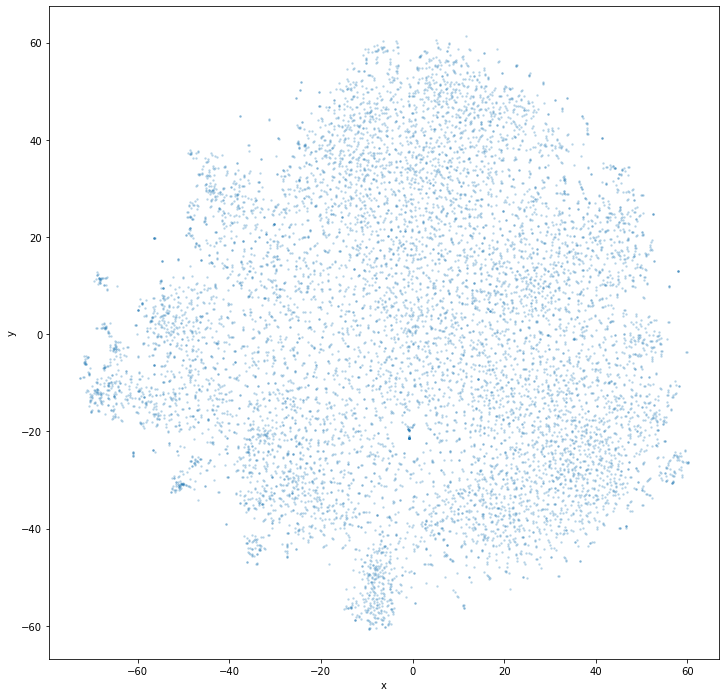

In [68]:
_= coords_df.plot.scatter('x','y', figsize=(12,12),
                           marker='.', s=10, alpha=0.2)

In [70]:

output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_= p.text(x=subset_df.x, y=subset_df.y, text = subset_df.token)
show(p)

Loading BokehJS ...